<a href="https://colab.research.google.com/github/tanmayyb/nma_deep_learning_notebook/blob/main/Runtime_dictionary_saver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Save `imgdict` & `annodict`

## Data Loading and Basic Functions

In [1]:
import os
import requests
import random
import json
import numpy as np
from skimage import io
from scipy import ndimage
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import torch
from torch import nn
import torch.optim as optim
from torchsummary import summary
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [2]:
# @title Choose device
def set_device():
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

In [3]:
device = set_device()

GPU is not enabled in this notebook. 
If you want to enable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `GPU` from the dropdown menu


In [4]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
cd 'gdrive/My Drive/screw_dataset/unpacked/'

/content/gdrive/My Drive/screw_dataset/unpacked


In [7]:
#Load the json file with the annotation metadata
with open('mvtec_screws.json') as f:
  data = json.load(f)

print(data.keys())
print(data['images'][0])
print(data['annotations'][0])

dict_keys(['categories', 'images', 'annotations', 'licenses', 'info'])
{'file_name': 'screws_001.png', 'height': 1440, 'width': 1920, 'id': 1, 'license': 1}
{'area': 3440.97, 'bbox': [184.5, 876.313, 55, 62.5631, 0], 'category_id': 7, 'id': 1001, 'image_id': 1, 'is_crowd': 0}


In [8]:
#Make a dictionary (imgdict), and attach image metadata by image ID
imgdict  = {l['id']:l for l in data['images']}

In [9]:
#attach images to imgdict that contains metadata
for i in imgdict.values():
  i['image'] = io.imread(os.path.join('images', i['file_name']))[:,:,:3]

In [10]:
#@title set up `annodict` annotation dict

# remap annotations to dict by image_id
from collections import defaultdict
annodict = defaultdict(list)
for annotation in data['annotations']:
  annodict[annotation['image_id']].append(annotation)

# setup list of categories
categories = data['categories']
ncategories = len(categories)
cat_ids = [i['id'] for i in categories]

In [11]:
category_names = {7:'nut', 3:'wood screw', 2:'lag wood screw', 8:'bolt',
                  6:'black oxide screw', 5:'shiny screw', 4:'short wood screw',
                  1:'long lag screw', 9:'large nut', 11:'nut', 10:'nut',
                  12:'machine screw', 13:'short machine screw' }

## Data saving

In [12]:
import pickle

In [14]:
cd /

/


In [22]:
path = 'content/gdrive/My Drive/screw_dataset/'

In [27]:
with open(os.path.join(path, 'saved_variables', 'annodict.pkl'), 'wb') as fid:
  pickle.dump(annodict, fid)

In [28]:
with open(os.path.join(path, 'saved_variables', 'imgdict.pkl'), 'wb') as fid:
  pickle.dump(imgdict, fid)

## Data Loading test

In [34]:
with open(os.path.join(path, 'saved_variables', 'imgdict.pkl'), 'rb') as fid:
  abc = pickle.load(fid)

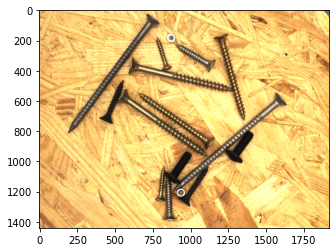

In [38]:
plt.imshow(abc[1]['image'])